# Actividad2

Precio Dolar respecto al sol peruano.

https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01234PM/html

In [65]:
# instala paquetes necesarios
install.packages("tseries")

library(tseries)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## 1. Lectura y transformaciones iniciales

In [66]:
# lectura de datos
df <- read.csv("data.csv")
head(df, 2)

,Fecha,TipoCambio
,<chr>,<dbl>
1,Ene92,0.9879545
2,Feb92,0.9715000


In [67]:
# Transformamos datos a formato fecha apropiado para poder tener valores

meses_en_espanol <- c("Ene", "Feb", "Mar", "Abr", "May", "Jun", 
                      "Jul", "Ago", "Sep", "Oct", "Nov", "Dic")

meses_en_ingles <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                     "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")

# Reemplazar los nombres de los meses en la columna de fecha
for (i in 1:length(meses_en_espanol)) {
  df$Fecha <- gsub(meses_en_espanol[i], meses_en_ingles[i], df$Fecha)
}

# Convertir la columna de fecha a un formato de fecha estándar
df$Fecha <- as.Date(paste0("01-", df$Fecha), format = "%d-%b%y")
head(df)


,Fecha,TipoCambio
,<date>,<dbl>
1,1992-01-01,0.9879545
2,1992-02-01,0.9715000
3,1992-03-01,0.9550000
4,1992-04-01,1.0215000
5,1992-05-01,1.1310000
6,1992-06-01,1.1783333


completo datos para verificar si hay datos faltantes

In [68]:
# Crear una secuencia de fechas completas desde la primera hasta la última fecha
fecha_inicio <- min(df$Fecha)
fecha_fin <- max(df$Fecha)

fechas_completas <- seq(from = fecha_inicio, to = fecha_fin, by = "month")
# Crear un data frame con las fechas completas
datos_completos <- data.frame(Fecha = fechas_completas)

# Unir los datos completos con los datos originales
datos_completos <- merge(datos_completos, df, by = "Fecha", all.x = TRUE)


## 2. Análisis de Datos DAC

In [69]:
# Descripción del dataframe datos_completos
summary(datos_completos)

# Buscar valores faltantes en el dataframe
valores_faltantes <- sum(is.na(datos_completos$TipoCambio))
cat("Número de valores faltantes en la columna 'TipoCambio':", valores_faltantes, "\n")

     Fecha              TipoCambio   
 Min.   :1992-01-01   Min.   :0.955  
 1st Qu.:2000-02-22   1st Qu.:2.760  
 Median :2008-04-16   Median :3.241  
 Mean   :2008-04-16   Mean   :3.054  
 3rd Qu.:2016-06-08   3rd Qu.:3.468  
 Max.   :2024-08-01   Max.   :4.107  

Número de valores faltantes en la columna 'TipoCambio': 0 


In [70]:
# CANTIDAD DE REGISTROS
cantidad_registros <- nrow(datos_completos)
cat("Cantidad de registros en el dataframe datos_completos:", cantidad_registros, "\n")

Cantidad de registros en el dataframe datos_completos: 392 


In [71]:
# Obtener estadísticas descriptivas adicionales
media <- mean(datos_completos$TipoCambio, na.rm = TRUE)
mediana <- median(datos_completos$TipoCambio, na.rm = TRUE)
desviacion_estandar <- sd(datos_completos$TipoCambio, na.rm = TRUE)
moda <- as.numeric(names(sort(table(datos_completos$TipoCambio), decreasing = TRUE)[1]))

cat("Media del Tipo de Cambio:", media, "\n")
cat("Mediana del Tipo de Cambio:", mediana, "\n")
cat("Desviación Estándar del Tipo de Cambio:", desviacion_estandar, "\n")
cat("Moda del Tipo de Cambio:", moda, "\n")

Media del Tipo de Cambio: 3.054411 
Mediana del Tipo de Cambio: 3.240978 
Desviación Estándar del Tipo de Cambio: 0.5763696 
Moda del Tipo de Cambio: 3.248375 


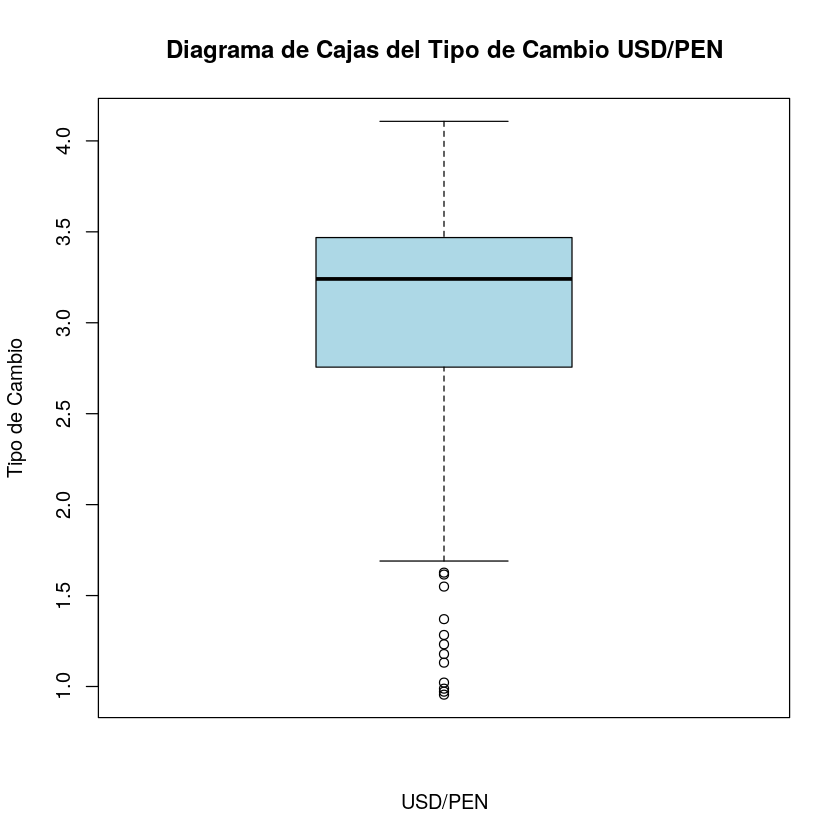

In [72]:
# Crear un diagrama de cajas para el Tipo de Cambio
boxplot(datos_completos$TipoCambio, main = "Diagrama de Cajas del Tipo de Cambio USD/PEN",
    ylab = "Tipo de Cambio", xlab = "USD/PEN", col = "lightblue")

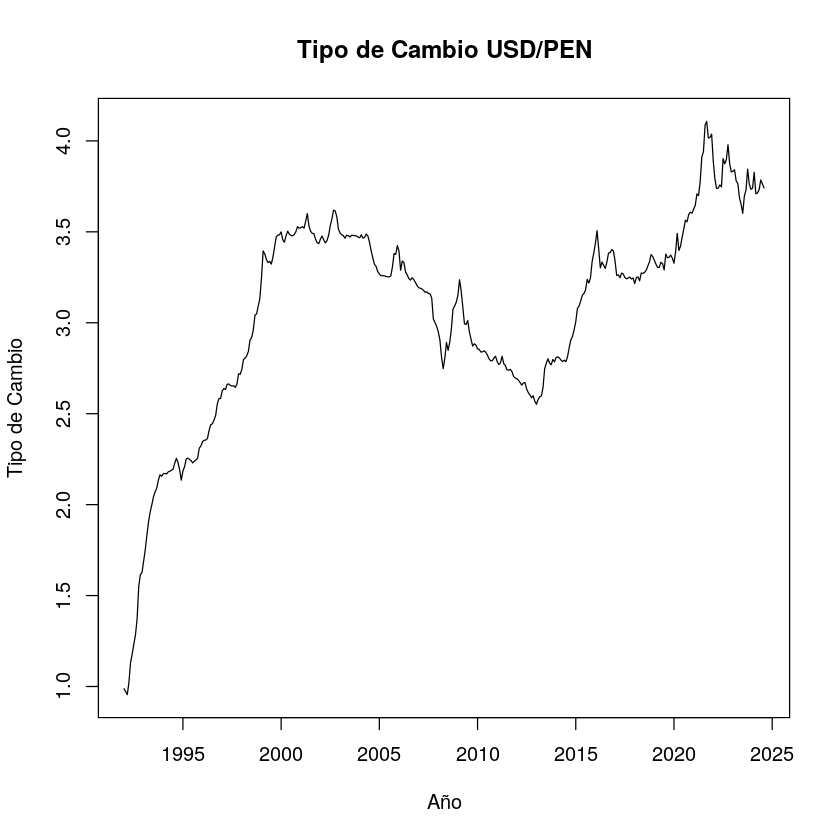

In [73]:
# Graficar la serie temporal
serie_completa <- ts(datos_completos$TipoCambio, start = c(1992, 1), frequency = 12)
plot(serie_completa, main = "Tipo de Cambio USD/PEN", 
     ylab = "Tipo de Cambio", xlab = "Año")


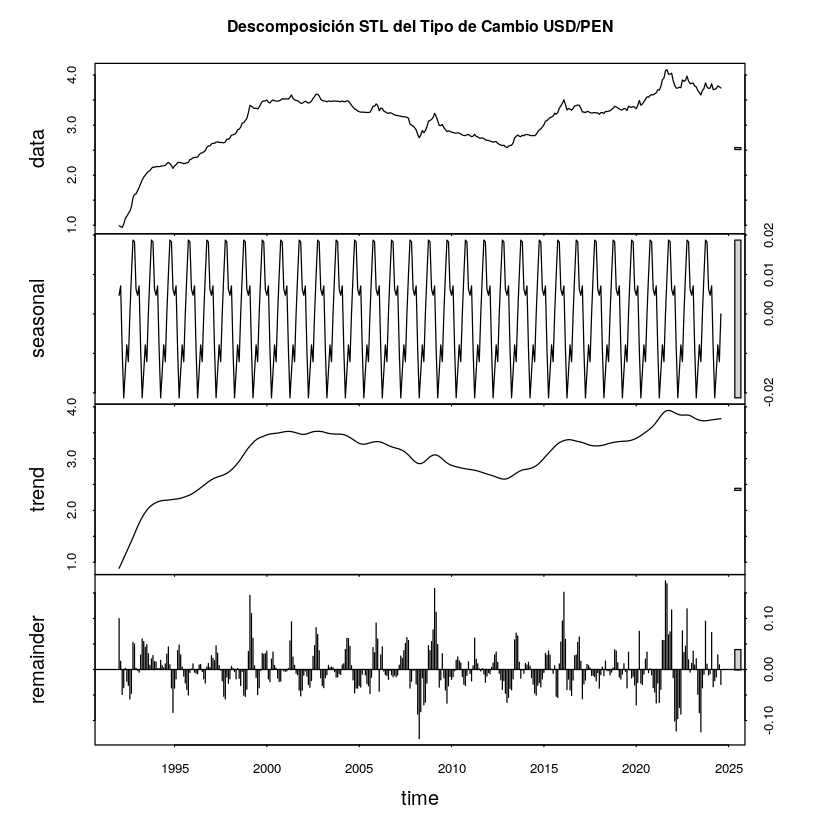

In [74]:
# Aplicar el método STL a la serie temporal
descomposicion_stl <- stl(serie_completa, s.window = "periodic")

# Graficar la descomposición
plot(descomposicion_stl, main = "Descomposición STL del Tipo de Cambio USD/PEN")

In [75]:
# Realizar la prueba de Dickey-Fuller aumentada (ADF)
# De acuerdo a p-valor serie seria no estacionaria


adf_test <- adf.test(serie_completa, alternative = "stationary")
print(adf_test)


	Augmented Dickey-Fuller Test

data:  serie_completa
Dickey-Fuller = -3.039, Lag order = 7, p-value = 0.1384
alternative hypothesis: stationary



## 3. Estabilizacion de la curva

se aplicará diferenciacion 

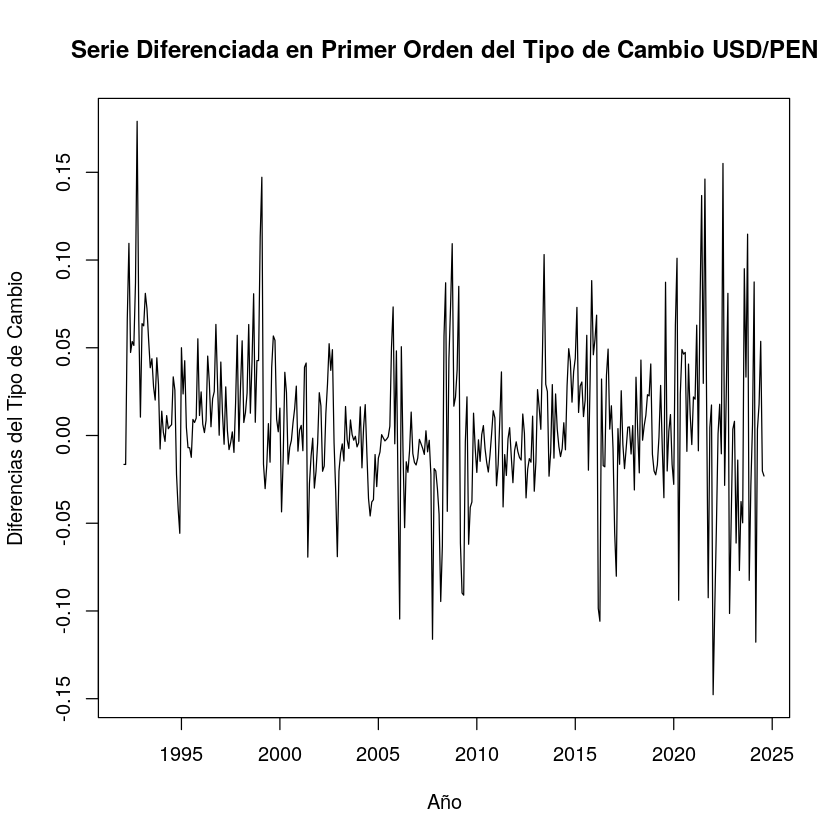

In [76]:
# Aplicar diferenciación en primer orden
serie_diferenciada <- diff(serie_completa, differences = 1)

# Graficar la serie diferenciada
plot(serie_diferenciada, main = "Serie Diferenciada en Primer Orden del Tipo de Cambio USD/PEN", 
    ylab = "Diferencias del Tipo de Cambio", xlab = "Año")

In [77]:
# Realizar la prueba de Dickey-Fuller aumentada (ADF)
# De acuerdo a p-valor serie seria estacionaria


adf_test <- adf.test(serie_diferenciada, alternative = "stationary")
print(adf_test)

Warning message in adf.test(serie_diferenciada, alternative = "stationary"):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  serie_diferenciada
Dickey-Fuller = -6.3935, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary



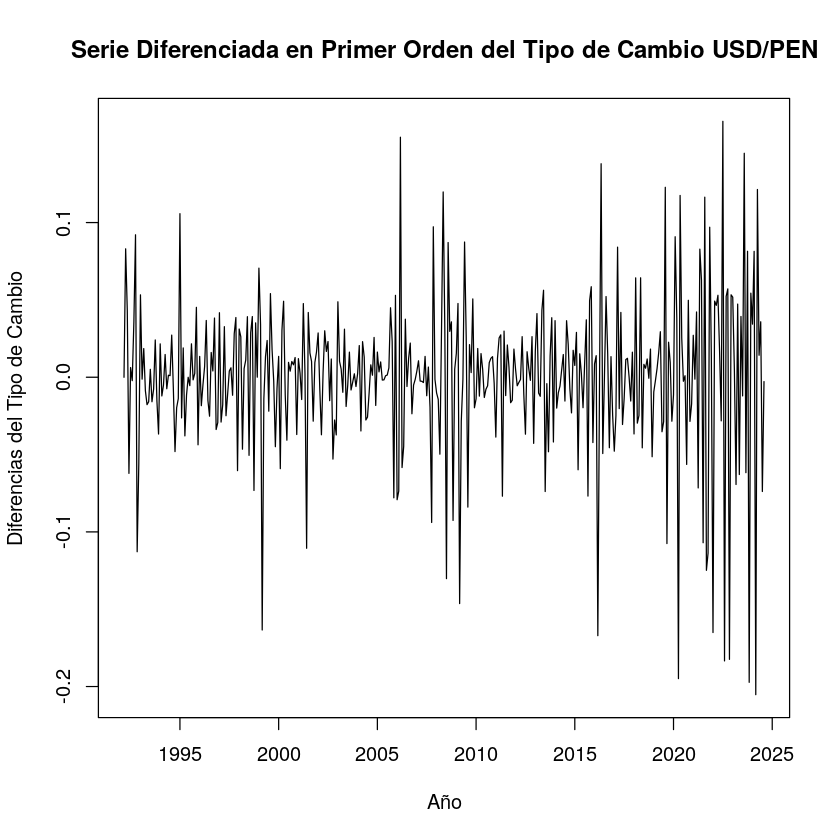

In [78]:
# Aplicar diferenciación en primer orden
serie_diferenciada2 <- diff(serie_diferenciada, differences = 1)

# Graficar la serie diferenciada
plot(serie_diferenciada2, main = "Serie Diferenciada en Primer Orden del Tipo de Cambio USD/PEN", 
    ylab = "Diferencias del Tipo de Cambio", xlab = "Año")

In [79]:
# Realizar la prueba de Dickey-Fuller aumentada (ADF)
# De acuerdo a p-valor serie seria estacionaria


adf_test <- adf.test(serie_diferenciada2, alternative = "stationary")
print(adf_test)

Warning message in adf.test(serie_diferenciada2, alternative = "stationary"):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  serie_diferenciada2
Dickey-Fuller = -11.574, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary



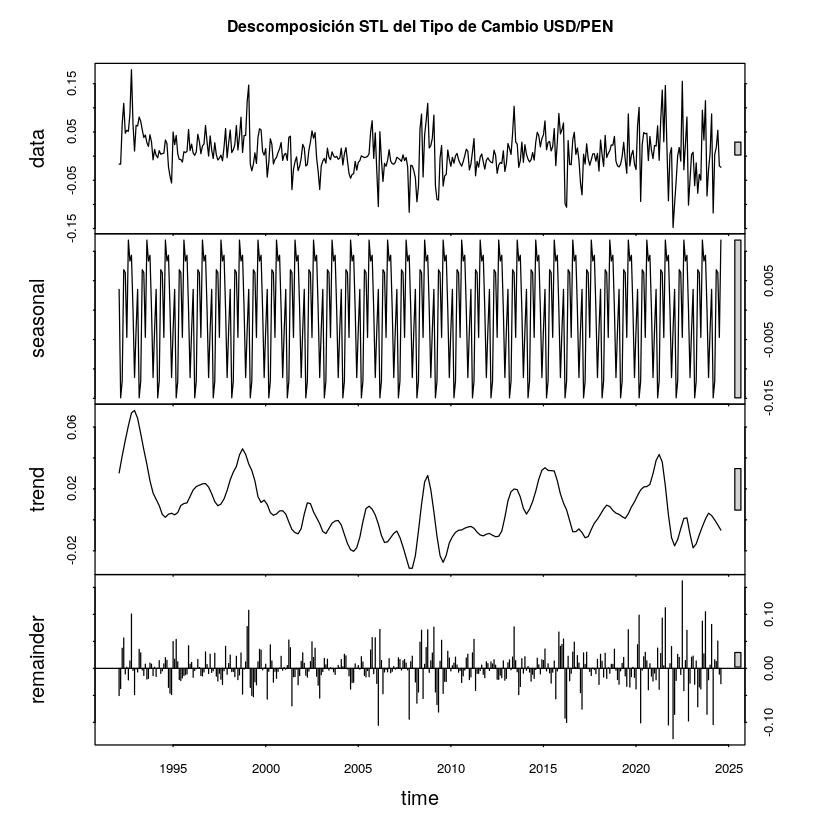

In [80]:
# Aplicar el método STL a la serie temporal
descomposicion_stl <- stl(serie_diferenciada, s.window = "periodic")

# Graficar la descomposición
plot(descomposicion_stl, main = "Descomposición STL del Tipo de Cambio USD/PEN")

### 3.1 Correlacion y correlacion parcial

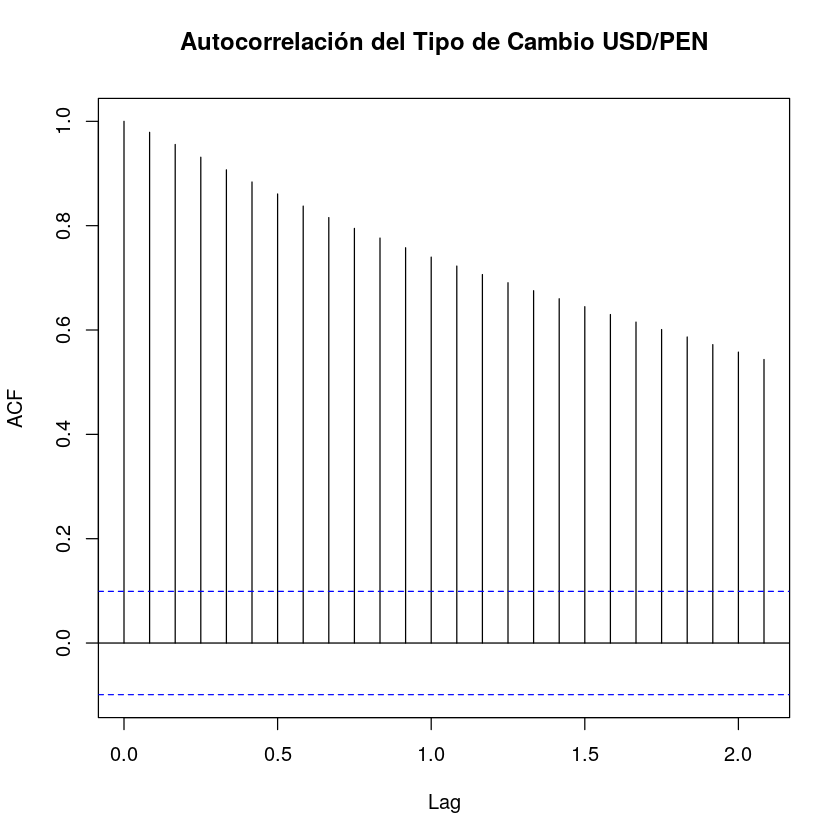

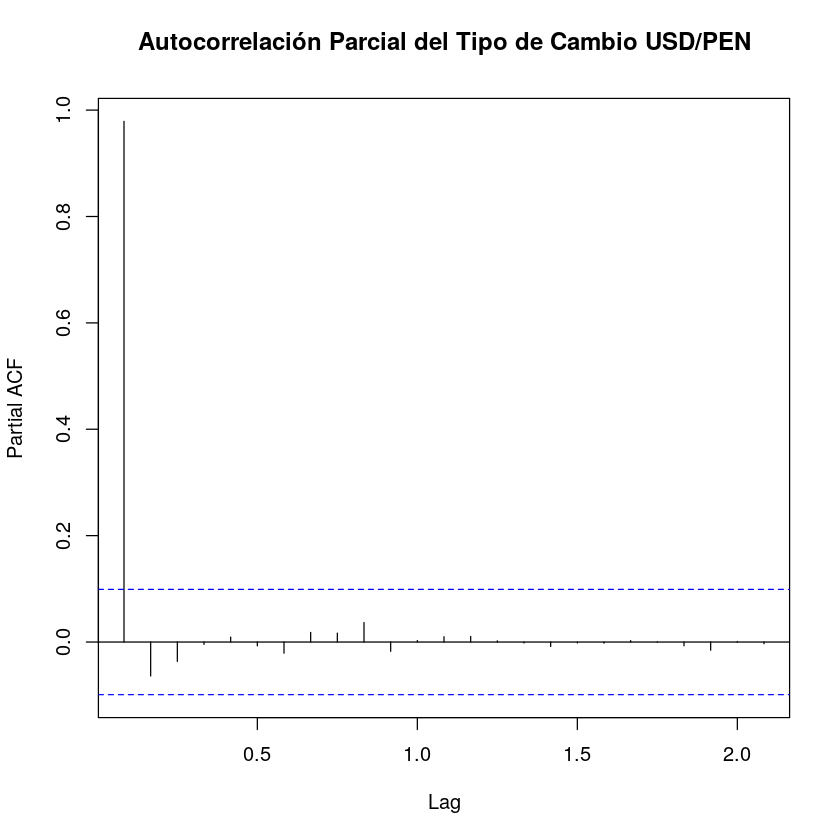

In [81]:
# Calcular la autocorrelación y la autocorrelación parcial
acf(serie_completa, main = "Autocorrelación del Tipo de Cambio USD/PEN", ci = 0.95)
pacf(serie_completa, main = "Autocorrelación Parcial del Tipo de Cambio USD/PEN", , ci = 0.95)

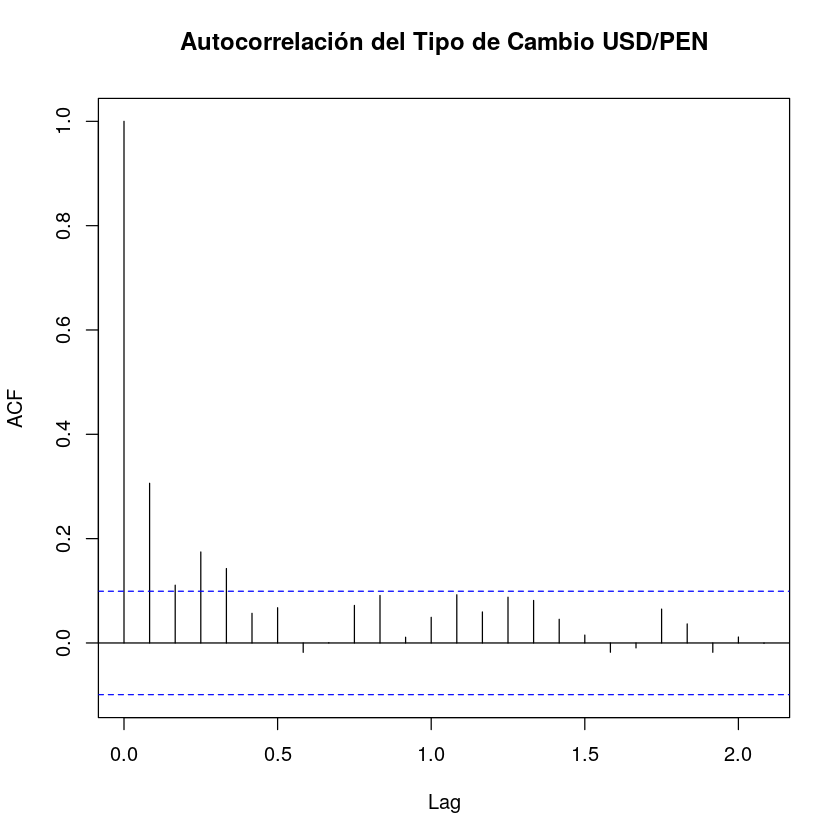

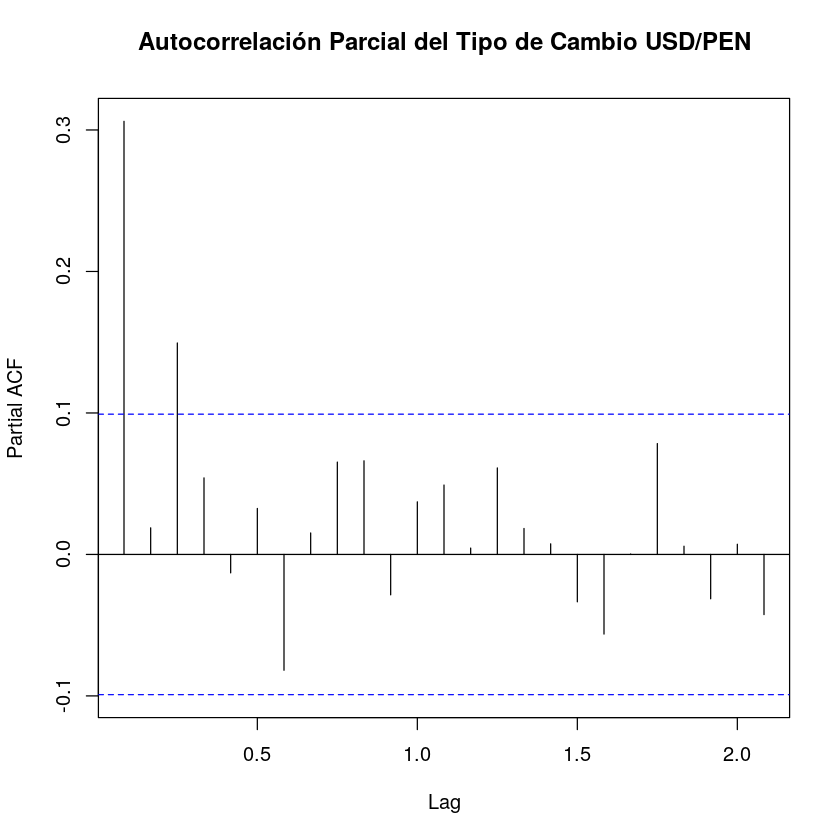

In [82]:
# Calcular la autocorrelación y la autocorrelación parcial
acf(serie_diferenciada, main = "Autocorrelación del Tipo de Cambio USD/PEN", ci = 0.95)
pacf(serie_diferenciada, main = "Autocorrelación Parcial del Tipo de Cambio USD/PEN", , ci = 0.95)

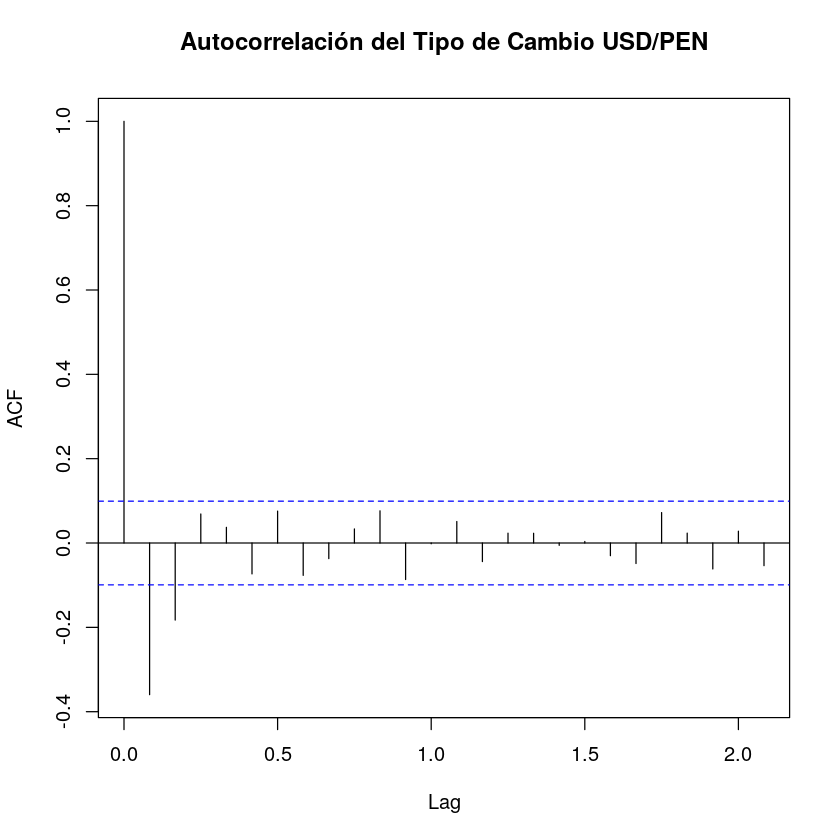

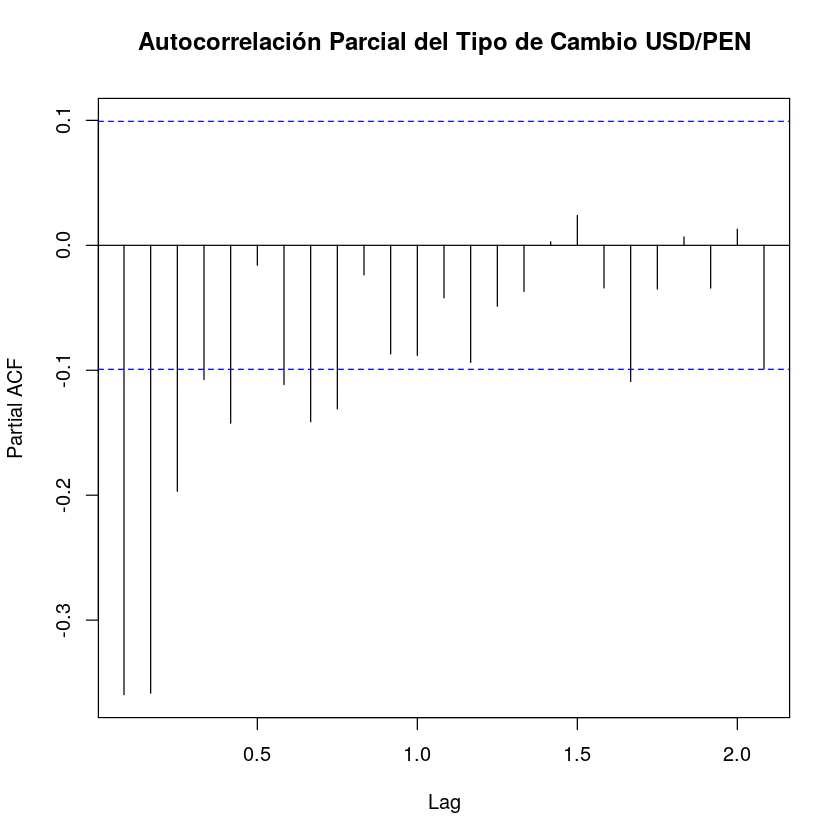

In [83]:
# Calcular la autocorrelación y la autocorrelación parcial
acf(serie_diferenciada2, main = "Autocorrelación del Tipo de Cambio USD/PEN", ci = 0.95)
pacf(serie_diferenciada2, main = "Autocorrelación Parcial del Tipo de Cambio USD/PEN", , ci = 0.95)

nos damos cuenta que la correlacion con diferenciacion 1 es la que nos brinda una mejor varianza a demás de brindarnos un modelo estacional

## 4. Ejecucion de modelos

### 4.1 Generación del Modelo Auto ARIMA

Para generar un modelo Auto ARIMA, utilizaremos la función `auto.arima` del paquete `forecast`. Este modelo se ajustará automáticamente a los datos de la serie temporal, seleccionando los mejores parámetros para `p`, `d` y `q`. En este caso, configuraremos los parámetros `max.p` y `max.q` a 10.

In [84]:
# Instalar y cargar el paquete forecast si no está instalado
if (!require(forecast)) {
    install.packages("forecast")
    library(forecast)
}

In [85]:
# Separar los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
set.seed(123)  # Para reproducibilidad

# Determinar el índice de separación
n <- length(serie_completa)
indice_separacion <- floor(0.9 * n)

# Crear conjuntos de entrenamiento y prueba
entrenamiento <- window(serie_completa, end = c(1992 + (indice_separacion - 1) %/% 12, (indice_separacion - 1) %% 12 + 1))
prueba <- window(serie_completa, start = c(1992 + indice_separacion %/% 12, indice_separacion %% 12 + 1))

# Mostrar las longitudes de los conjuntos
cat("Longitud del conjunto de entrenamiento:", length(entrenamiento), "\n")
cat("Longitud del conjunto de prueba:", length(prueba), "\n")

Longitud del conjunto de entrenamiento: 352 
Longitud del conjunto de prueba: 40 


Genero 3 modelos cambiando parametros

In [86]:
# Generar el modelo Auto ARIMA
modelo_auto_arima <- auto.arima(serie_completa, max.d = 10, max.p = 10, max.q = 10
                    , max.D=10, max.P=10, max.Q=10, lambda="auto", allowmean=F, allowdrift=F,
                    test=c("adf"))

# Generar el modelo Auto ARIMA
modelo_auto_arima2 <- auto.arima(serie_completa, max.d = 10, max.p = 10, max.q = 10
                    , max.D=10, max.P=10, max.Q=10, lambda="auto", allowmean=T, allowdrift=T,
                    test=c("adf"))


# Aplicacion Modelo Arima (1,1,1)
modelo_arima <- Arima(serie_completa, order = c(1, 1, 1))

In [87]:
# Resumen del modelo 1
modelo_auto_arima
summary(modelo_auto_arima)

Series: serie_completa 
ARIMA(0,0,0) with zero mean 
Box Cox transformation: lambda= 1.510953 

sigma^2 = 9.717:  log likelihood = -1001.91
AIC=2005.82   AICc=2005.83   BIC=2009.79

Series: serie_completa 
ARIMA(0,0,0) with zero mean 
Box Cox transformation: lambda= 1.510953 

sigma^2 = 9.717:  log likelihood = -1001.91
AIC=2005.82   AICc=2005.83   BIC=2009.79

Training set error measures:
                   ME     RMSE      MAE      MPE     MAPE     MASE      ACF1
Training set 2.054411 2.133532 2.054848 65.41761 65.46284 11.62763 0.9789214

In [88]:
confint(modelo_auto_arima)

2.5 %,97.5 %


In [89]:
# Datos Modelo 2
summary(modelo_auto_arima2)
modelo_auto_arima2

Series: serie_completa 
ARIMA(0,0,2) with non-zero mean 
Box Cox transformation: lambda= 1.510953 

Coefficients:
         ma1     ma2    mean
      1.6666  0.8618  2.9615
s.e.  0.0313  0.0194  0.0532

sigma^2 = 0.09022:  log likelihood = -85.4
AIC=178.8   AICc=178.91   BIC=194.69

Training set error measures:
                      ME      RMSE       MAE       MPE     MAPE     MASE
Training set -0.01337663 0.1900741 0.1368539 -2.269824 5.756589 0.774406
                  ACF1
Training set 0.7226472

Series: serie_completa 
ARIMA(0,0,2) with non-zero mean 
Box Cox transformation: lambda= 1.510953 

Coefficients:
         ma1     ma2    mean
      1.6666  0.8618  2.9615
s.e.  0.0313  0.0194  0.0532

sigma^2 = 0.09022:  log likelihood = -85.4
AIC=178.8   AICc=178.91   BIC=194.69

In [90]:
confint(modelo_auto_arima2)

,2.5 %,97.5 %
ma1,1.6052187,1.7280664
ma2,0.8237562,0.8998379
intercept,2.8572014,3.0657244


In [91]:
summary(modelo_arima)

Series: serie_completa 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.7157  -0.4675
s.e.  0.1255   0.1649

sigma^2 = 0.001673:  log likelihood = 696
AIC=-1386   AICc=-1385.93   BIC=-1374.09

Training set error measures:
                     ME       RMSE        MAE       MPE      MAPE      MASE
Training set 0.00373404 0.04074376 0.02823311 0.1833201 0.9574573 0.1597608
                   ACF1
Training set 0.03248452

In [92]:
confint(modelo_arima)

,2.5 %,97.5 %
ar1,0.4696743,0.9617370
ma1,-0.7906904,-0.1443765


# Predicciones

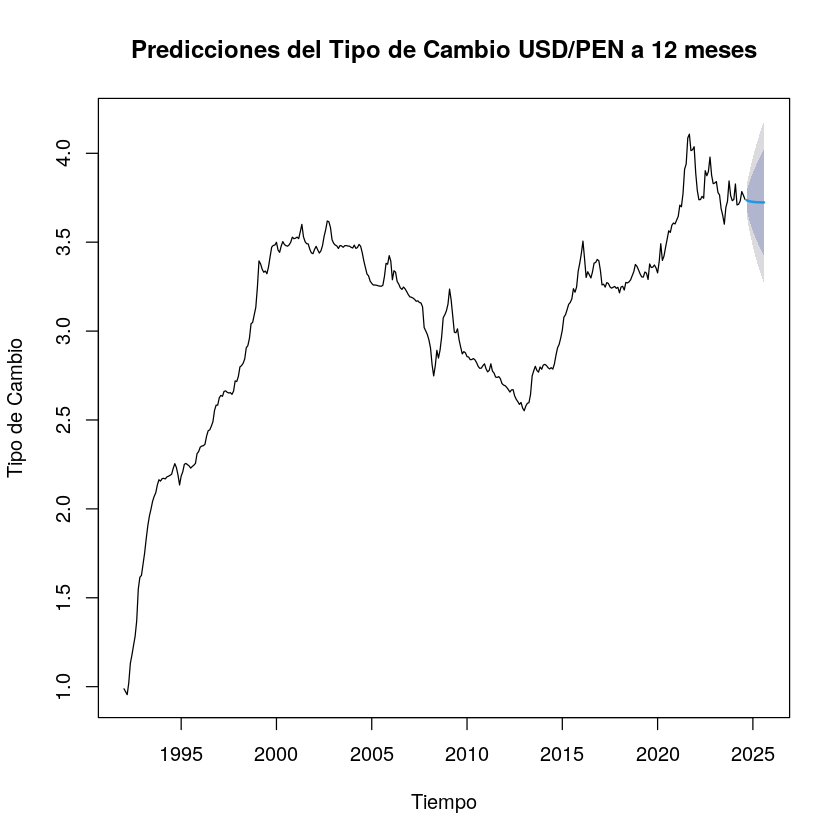

In [93]:
# Realizar predicciones a 12 meses con el modelo ARIMA
predicciones <- forecast(modelo_arima, h = 12)

# Graficar las predicciones
plot(predicciones, main = "Predicciones del Tipo de Cambio USD/PEN a 12 meses",
    ylab = "Tipo de Cambio", xlab = "Tiempo")

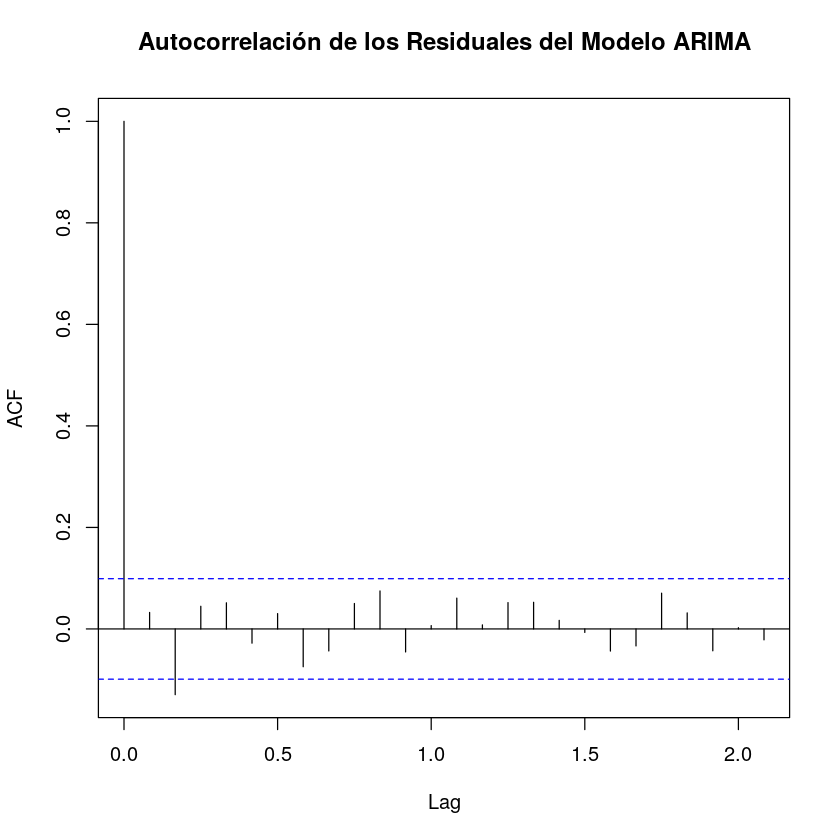

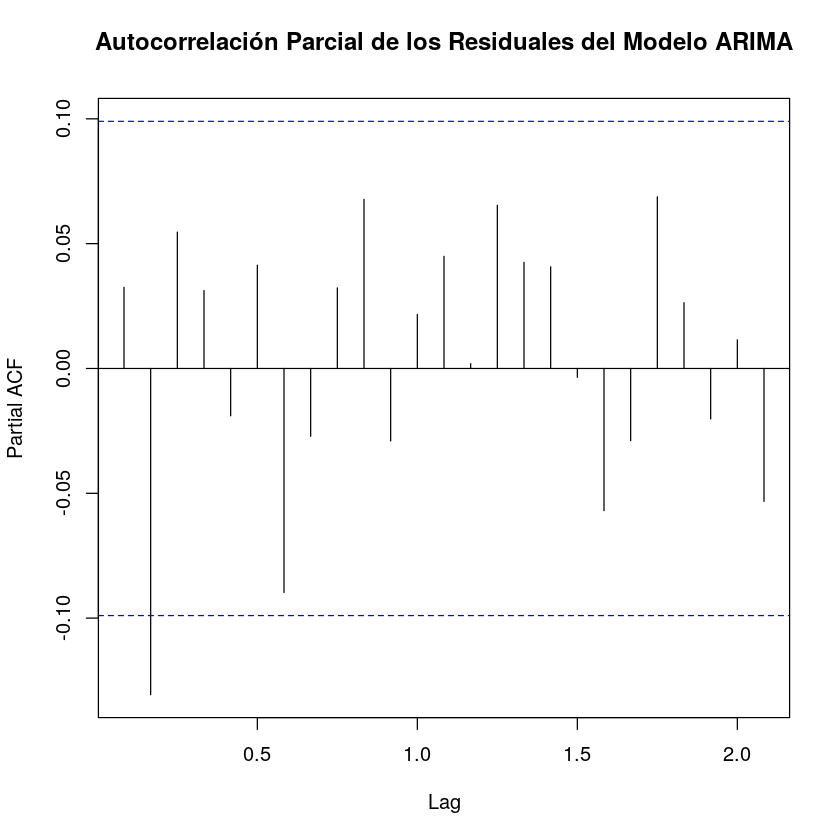

In [94]:
# Generar las correlaciones y correlaciones parciales del modelo ARIMA
acf(residuals(modelo_arima), main = "Autocorrelación de los Residuales del Modelo ARIMA", ci = 0.95)
pacf(residuals(modelo_arima), main = "Autocorrelación Parcial de los Residuales del Modelo ARIMA", ci = 0.95)